In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/set_b.csv")
df.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [2]:
df.shape

(656, 4)

In [3]:
df.describe()

,dataset,fname,label,sublabel
count,656,656,461,149
unique,1,656,3,2
top,b,set_b/Btraining_normal_106_1306776721273_B1.wav,normal,noisynormal
freq,656,1,320,120


In [4]:
df.label.unique()

array(['extrastole', 'murmur', 'normal', nan], dtype=object)

In [5]:
df = df[pd.notnull(df["label"])]

df.shape

(461, 4)

In [6]:
df.label.unique()

array(['extrastole', 'murmur', 'normal'], dtype=object)

In [7]:
for i, _ in df.iterrows():
    path = df.ix[i, "fname"]
    path = path.replace("Btraining_", "")
    
    first_ind = path.find(df.ix[i, "label"])
    
    path = "./data/wav/" + path[first_ind:]
    
    if pd.isnull(df.ix[i, "sublabel"]):
        final_ind = path.find("_")

        path = path[:final_ind] + "_" + path[final_ind:]

    df.ix[i, "fname"] = path

In [8]:
df.head()

,dataset,fname,label,sublabel
0,b,./data/wav/extrastole__127_1306764300147_C2.wav,extrastole,NaN
1,b,./data/wav/extrastole__128_1306344005749_A.wav,extrastole,NaN
2,b,./data/wav/extrastole__130_1306347376079_D.wav,extrastole,NaN
3,b,./data/wav/extrastole__134_1306428161797_C1.wav,extrastole,NaN
4,b,./data/wav/extrastole__138_1306762146980_B.wav,extrastole,NaN


In [9]:
from scipy.io import wavfile

def graph_spectrogram(wav_file, save_png=False):
    _, data = get_wav_info(wav_file)
    window = 256
    samp_freq = 256
    plt.specgram(data, window, samp_freq)
    
    if save_png:
        plt.axis("off")
        plt.specgram(data, window, samp_freq)
        plt.savefig(wav_file.replace("wav", "png"),
                    dpi=100, # Dots per inch
                    frameon=False,
                    aspect="normal",
                    bbox_inches="tight",
                    pad_inches=0) # Spectrogram saved as a .png
        plt.close("all")

def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

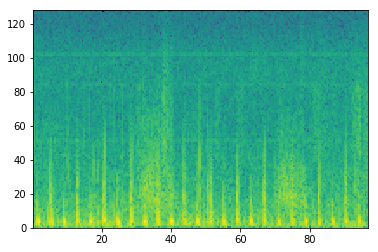

In [10]:
import IPython
from matplotlib import pyplot as plt
%matplotlib inline

ind = df[df.label == "normal"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])


IPython.display.Audio(df.ix[ind, "fname"])

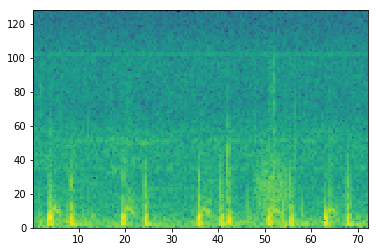

In [11]:
ind = df[df.label == "murmur"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])


IPython.display.Audio(df.ix[ind, "fname"])

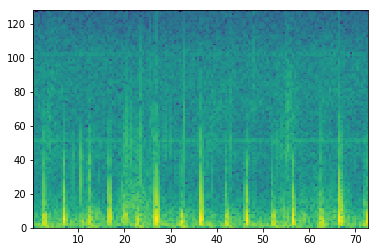

In [12]:
ind = df[df.label == "extrastole"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])


IPython.display.Audio(df.ix[ind, "fname"])

In [13]:
from PIL import Image

graph_spectrogram(df.ix[ind, "fname"], True)

Image.open(df.ix[ind, "fname"].replace("wav", "png")).size

(504, 329)

In [14]:
from PIL import ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    
    if bbox:
        return im.crop(bbox)

In [15]:
im = Image.open(df.ix[0, "fname"].replace("wav", "png"))
im = trim(im)
im.save(df.ix[0, "fname"].replace("wav", "png"))

Image.open(df.ix[ind, "fname"].replace("wav", "png")).size

(465, 302)

In [16]:
df.ix[509, :].fname

'./data/wav/murmur_noisymurmur_135_1306428972976_C.wav'

In [17]:
print(df.ix[509, "fname"])

./data/wav/murmur_noisymurmur_135_1306428972976_C.wav


In [18]:
import time
import os.path

global_size = (496, 369)

gen = False

for i, _ in df.iterrows():
    path = df.ix[i, "fname"].replace("wav", "png")
    df.ix[i, "iname"] = path

    if not os.path.isfile(path):
        gen = True
        graph_spectrogram(df.ix[i, "fname"], True)

        im = trim(Image.open(path))
        im.save(path)

        if im.size != global_size:
            print("Variable Image Size: " + str(i) + ", " + str(im.size) + ", " + str(global_size))

    time.sleep(0.05)

if not gen:
    print("... already generated previously ...")

df.head()

... already generated previously ...


,dataset,fname,label,sublabel,iname
0,b,./data/wav/extrastole__127_1306764300147_C2.wav,extrastole,NaN,./data/png/extrastole__127_1306764300147_C2.png
1,b,./data/wav/extrastole__128_1306344005749_A.wav,extrastole,NaN,./data/png/extrastole__128_1306344005749_A.png
2,b,./data/wav/extrastole__130_1306347376079_D.wav,extrastole,NaN,./data/png/extrastole__130_1306347376079_D.png
3,b,./data/wav/extrastole__134_1306428161797_C1.wav,extrastole,NaN,./data/png/extrastole__134_1306428161797_C1.png
4,b,./data/wav/extrastole__138_1306762146980_B.wav,extrastole,NaN,./data/png/extrastole__138_1306762146980_B.png


In [19]:
map = {
    "normal": 0,
    "murmur": 1
}

o_df = df

df = pd.DataFrame()
df["image"] = o_df["iname"]
df["label"]  = o_df["label"]

df.head()

,image,label
0,./data/png/extrastole__127_1306764300147_C2.png,extrastole
1,./data/png/extrastole__128_1306344005749_A.png,extrastole
2,./data/png/extrastole__130_1306347376079_D.png,extrastole
3,./data/png/extrastole__134_1306428161797_C1.png,extrastole
4,./data/png/extrastole__138_1306762146980_B.png,extrastole


In [20]:
df = df[df.label != "extrastole"]

for i, _ in df.iterrows():
    df.ix[i, "label"] = map[df.ix[i, "label"]]

df.head()

,image,label
46,./data/png/murmur__112_1306243000964_A.png,1
47,./data/png/murmur__112_1306243000964_B.png,1
48,./data/png/murmur__112_1306243000964_D.png,1
49,./data/png/murmur__116_1306258689913_A.png,1
50,./data/png/murmur__116_1306258689913_C.png,1


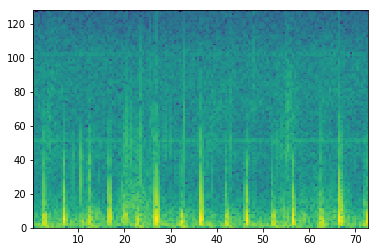

In [21]:
import IPython
from matplotlib import pyplot as plt
%matplotlib inline

graph_spectrogram(o_df.ix[ind, "fname"])


IPython.display.Audio(o_df.ix[ind, "fname"])

4000


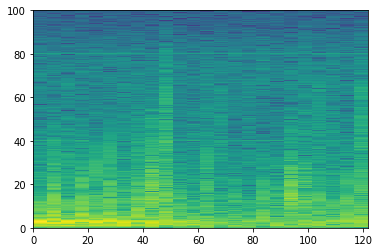

In [22]:
ind = o_df[o_df.label == "normal"].first_valid_index()

sample_rate, samples = get_wav_info(o_df.ix[ind, "fname"])

window = 1024
samp_freq = int(1.0 / 0.005)
plt.specgram(samples,
             NFFT=window,
             Fs=samp_freq,
            noverlap=10)

print(sample_rate)

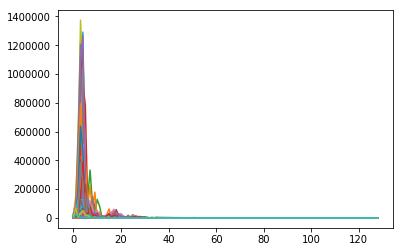

In [23]:
from scipy.signal import spectrogram

ind = o_df[o_df.label == "normal"].first_valid_index()

sample_rate, samples = get_wav_info(o_df.ix[ind, "fname"])

f, t, Sxx = spectrogram(samples, fs=sample_rate)

plt.plot(Sxx)
plt.show()

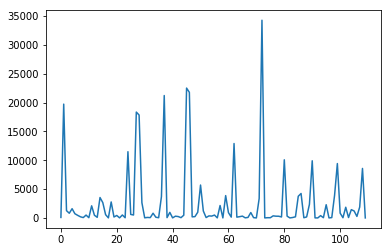

In [24]:
plt.plot(Sxx[0])
plt.show()

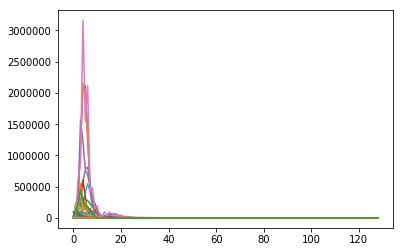

In [25]:
ind = o_df[o_df.label == "extrastole"].first_valid_index()

sample_rate, samples = get_wav_info(o_df.ix[ind, "fname"])

f, t, Sxx = spectrogram(samples, fs=sample_rate)

plt.plot(Sxx)
plt.show()

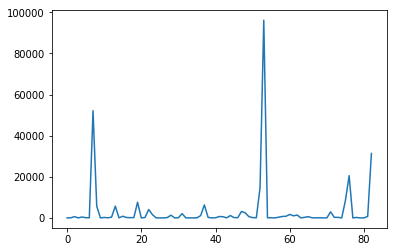

In [26]:
plt.plot(Sxx[0])
plt.show()

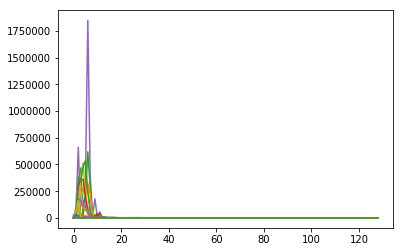

In [27]:
ind = o_df[o_df.label == "murmur"].first_valid_index()

sample_rate, samples = get_wav_info(o_df.ix[ind, "fname"])

f, t, Sxx = spectrogram(samples, fs=sample_rate)

plt.plot(Sxx)
plt.show()

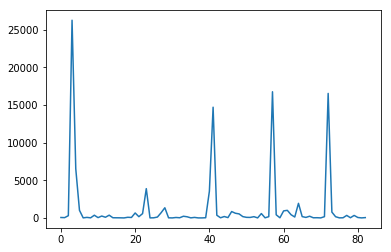

In [28]:
plt.plot(Sxx[0])
plt.show()

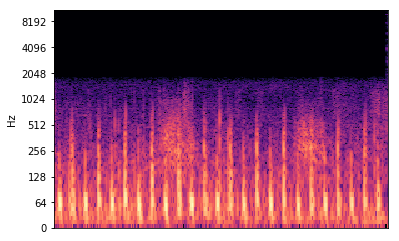

In [42]:
import librosa as lr
import librosa.display as lrd

ind = o_df[o_df.label == "normal"].first_valid_index()

y, sr = lr.load(o_df.ix[ind, "fname"])
D = lr.amplitude_to_db(lr.stft(y), ref=np.max)
lrd.specshow(D, y_axis="log")

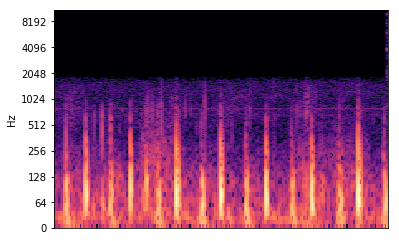

In [43]:
ind = o_df[o_df.label == "extrastole"].first_valid_index()

y, sr = lr.load(o_df.ix[ind, "fname"])
D = lr.amplitude_to_db(lr.stft(y), ref=np.max)
lrd.specshow(D, y_axis="log")

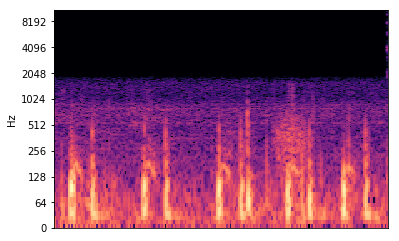

In [44]:
ind = o_df[o_df.label == "murmur"].first_valid_index()

y, sr = lr.load(o_df.ix[ind, "fname"])
D = lr.amplitude_to_db(lr.stft(y), ref=np.max)
lrd.specshow(D, y_axis="log")